In [1]:
import scipy.io
import numpy as np
from numpy import linalg as LA
import matplotlib
import time
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from functions import *
from numpy import random

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
savedir = "results/question1/"

In [2]:
# load data
mat = scipy.io.loadmat('face.mat')
raw_data = mat['X']

D,N = raw_data.shape

raw_data = np.transpose(raw_data)

training_data = np.empty([int(520*0.8), 2576])
testing_data = np.empty([int(520*0.2), 2576])

# create training and test data
for x in range(52):
    training_data[x*8:(x+1)*8] = raw_data[x*10:x*10+8]
    testing_data[x*2:(x+1)*2] = raw_data[x*10+8:(x+1)*10]

raw_data = np.transpose(raw_data)
training_data = np.transpose(training_data)
testing_data = np.transpose(testing_data)



In [3]:
# get mean image matrix
mean_face = training_data.mean(axis=1).reshape(-1,1)
# show_img(mean_face)
# save_img(mean_face, "results/question1/mean_face.png")

rank of each matrix is the same : 415
Most of eigen values in normal pca should be 0. But instead are complex due to numeric error. need a way to discard small eigen vals


In [4]:
# generate principal components
pca_eigw, pca_eigvec = normal_pca(training_data, mean_face)
lowdim_eigw, lowdim_eigvec = lowdim_pca(training_data, mean_face)

normal pca took  12.753588914871216  seconds.
low dimension pca took  0.14330196380615234  seconds.


eig val (2576,)
eig vec (416, 2576)


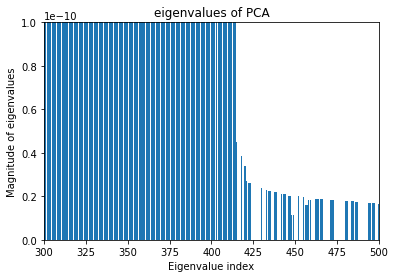

In [5]:
print("eig val",pca_eigw.shape)
print("eig vec",pca_eigvec.shape)

x_pos = [i for i, _ in enumerate(pca_eigw)]
plt.bar(x_pos,pca_eigw)
plt.axis([300,500,0,0.0000000001])
plt.title("eigenvalues of PCA")
plt.xlabel("Eigenvalue index")
plt.ylabel("Magnitude of eigenvalues")
filename = "eigzoom.eps"
savename = savedir+filename
# plt.savefig(savename)

u_norm = lowdim_eigvec

Normal PCA and Low dimension PCA timing 

In [6]:
# for i in range(10):
#     _,_ = lowdim_pca(training_data, mean_face)
#     _, _ = normal_pca(training_data, mean_face)    


In [7]:
# eigen_analysis(pca_eigw, pca_eigvec, lowdim_eigw, lowdim_eigvec)
# show_img(testing_data.T[0])
# save_img(testing_data.T[0], (savedir+"testing0.png"))

In [8]:
nn = [5,10,50,200,416]
# n = 416

for n in nn:
    img_name =savedir + str(n)+"pc_test.png"
    faces = reconstruct(testing_data.T, mean_face.T, u_norm.T, n)
#     show_img(faces[0])
#     save_img(faces[0], img_name)
    print("mean absolute error: ", get_err(training_data[:,0], faces[0]))


mean absolute error:  50.13958677666236
mean absolute error:  49.162887615425596
mean absolute error:  49.668402913466835
mean absolute error:  51.48583346639467
mean absolute error:  51.809520205145716


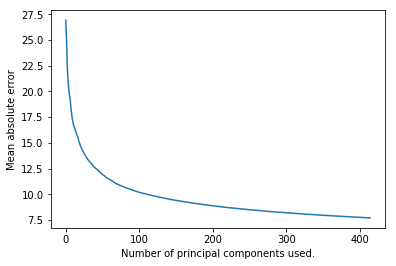

In [9]:
plot_err(training_data.T, testing_data.T, mean_face.T, u_norm.T, 0)

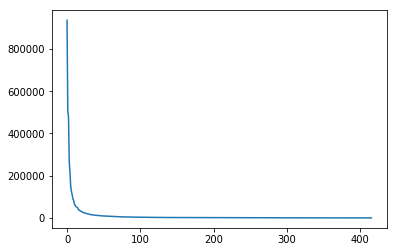

In [10]:
plt.plot(lowdim_eigw)

In [11]:
training_weights = np.matmul((training_data-mean_face).T, u_norm)
reconstructed_weights = np.matmul((testing_data-mean_face).T, u_norm[:,:n])

result = class_rate(training_weights[:,:n], reconstructed_weights)
print("classification rate: ", 100*np.sum(result)/len(result), "%.")


classification rate:  67.3076923076923 %.


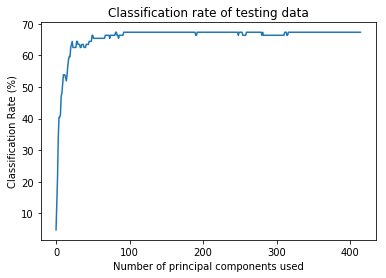

In [12]:
plot_class_rate(training_data.T, testing_data.T, mean_face.T, u_norm.T)


In [13]:

dist, indx = nn_class(training_data.T, faces)
print(len(indx))


104


In [14]:
# #still checking
# def confusion_mat(training_data, reconstructed):
#     dist, indx = nn_class(training_data.T, reconstructed)
#     TP, FP, FN, TN, accuracy, recall, precision = ([0]*52 for i in range(7)) 
#     for cl in range(52):
#         #compute TP and FN
#         for item in range(2):
#             if cl*8 <= indx[cl*2+item] <= (cl+1)*8:
#                 TP[cl] += 1
#             else:
#                 FN[cl] += 1
                
#         for item in [x for x in range(len(indx)) if x != cl*2 or x != cl*2+1]:
#             if cl*8 <= indx[item] <= (cl+1)*8:
#                 FP[cl] += 1
#             else:
#                 TN[cl] += 1
            
                    
# #     print("TP: ", TP)
# #     print("FN: ", FN)
# #     print("FP: ", FP)
# #     print("TN: ", TN)
    
#     for i in range(len(TP)):
#         accuracy[i] = 100*(TP[i] + TN[i])/(TP[i] + TN[i] + FP[i] + FN[i])
#         if TP[i]+FN[i] == 0:
#             recall[i] = 0
#         else:
#             recall[i] = 100*TP[i]/(TP[i]+FN[i])
#         if TP[i]+FP[i] == 0:
#             precision[i] = 0
#         else:
#             precision[i] = 100*TP[i]/(TP[i]+FP[i])
        
#     for i in range(len(accuracy)):
#         print("=========\tClass ", i ,"\t==========")
#         print("accuracy :\t", accuracy[i])
#         print("recall\t :\t", recall[i])
#         print("precision:\t", precision[i])


In [15]:
pred_label = []
print(faces.shape)
for i in range(len(indx)):
    pred_label.append(int(indx[i][0]/8))

(104, 2576)


In [16]:
print(pred_label)
actual_label = []
for x in range(len(pred_label)):
    actual_label.append(int(x/2))
# print(indx[0][0])

[9, 41, 39, 4, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 11, 12, 13, 13, 13, 14, 15, 15, 9, 16, 17, 19, 20, 20, 19, 19, 20, 20, 21, 38, 22, 22, 23, 23, 10, 24, 25, 25, 26, 26, 27, 27, 28, 28, 28, 46, 30, 30, 31, 31, 32, 32, 4, 34, 34, 40, 35, 35, 36, 36, 26, 37, 38, 38, 39, 39, 27, 45, 15, 28, 41, 41, 28, 10, 31, 44, 45, 45, 32, 29, 28, 28, 48, 48, 49, 49, 50, 16, 28, 40]


In [17]:
print(actual_label)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51]


In [18]:
conf = confusion_matrix(actual_label, pred_label)

In [19]:
lab = [x for x in range(52)]
print(lab)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


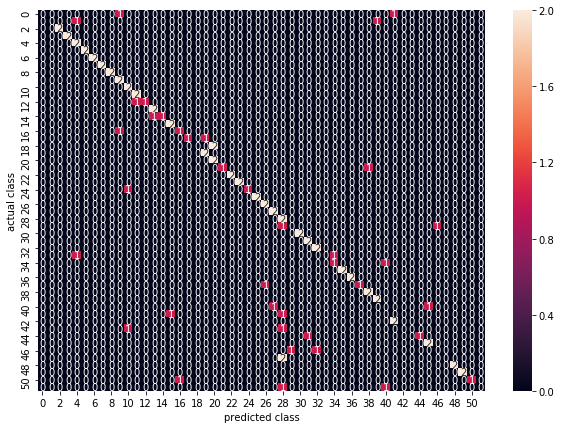

In [25]:
df_cm = pd.DataFrame(conf, index = [i for i in lab],
                  columns = [i for i in lab])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel("predicted class")
plt.ylabel("actual class")
plt.savefig(savedir+"confusionmatrix.eps")

In [26]:
print(training_data.shape)

(2576, 416)


In [27]:
print(len(training_data[0]))

416


In [122]:
def class_rate_tensor(training_data, testing_data):
    x,y,z = testing_data.shape
    x0,y0,z0 = training_data.shape
    if x == x0 and z == z0:
        result = np.empty([x,y])
        print(result.shape)
        for i in range(x):
            dist, indx = nn_class(training_data[i], testing_data[i])
            label = np.empty(indx.shape)
            for j in range(len(indx)):
                label[j] = int(indx[j]/8)
            print(label.flatten().shape)
            result[i] = label.flatten()
        mode = np.empty([y])
        for k in range(len(mode)):
            temp = [result[0,k], result[1,k], result[2,k], result[3,k]]
            mode[k] = int(max(set(temp), key=temp.count))
        return mode
    else:
        raise ValueError("training_data / testing_data dimension error")

In [123]:
mata = np.random.randint(10, size=(4, 416, 2576))
matb = np.random.randint(10, size=(4, 104, 2576))

In [124]:
res = class_rate_tensor(mata, matb)

(4, 104)
(104,)
(104,)
(104,)
(104,)


In [125]:
print(res.shape)

(104,)


In [126]:
print(res)

[49. 48. 50.  8. 50. 26. 50. 33. 44. 24. 48. 10. 29. 40. 24. 11. 32. 41.
 35. 33. 50. 13.  0. 48. 41.  0.  0. 26. 40.  8.  8. 13. 50.  1. 48. 33.
 34. 50. 26. 40. 32. 13.  9. 24. 15. 18. 33. 24. 11.  1. 42. 48. 32. 24.
 33. 48. 18. 11.  1.  8. 32. 24. 40. 49.  0. 17. 32. 38. 24.  2. 49. 16.
 25. 25. 48. 49. 49. 18. 40. 48. 10.  8.  1. 24.  5. 11. 32. 33.  1. 39.
 40. 27. 48. 41. 49.  9. 43. 26. 40. 26. 43.  4. 33. 40.]


In [116]:
seta = [2,1,3,4]
print(max(set(seta), key=seta.count))

1
